In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

In [4]:
    rlocs = np.arange(11.0) / 10.0
    tlocs = np.arccos(rlocs) # Conversion to polar angles
    gl1 = gf.FixedLocator(tlocs) # Positions
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))

In [10]:
class TaylorDiagram(object):
  def __init__(self, STD ,fig=None, rect=111, label='_'):
    self.STD = STD
    tr = PolarAxes.PolarTransform()
    # Correlation labels
    rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
    # rlocs = np.arange(11.0) / 10.0
    tlocs = np.arccos(rlocs) # Conversion to polar angles
    gl1 = gf.FixedLocator(tlocs) # Positions
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
    # Standard deviation axis extent
    self.smin = 0
    self.smax = 2 * self.STD
    gh = fa.GridHelperCurveLinear(tr,extremes=(0,(np.pi/2),self.smin,self.smax),grid_locator1=gl1,tick_formatter1=tf1,)
    if fig is None:
      fig = plt.figure()
    ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
    fig.add_subplot(ax)
    # Angle axis
    ax.axis['top'].set_axis_direction('bottom')
    ax.axis['top'].label.set_text("Correlation Coefficient")
    ax.axis['top'].toggle(ticklabels=True, label=True)
    ax.axis['top'].major_ticklabels.set_axis_direction('top')
    ax.axis['top'].label.set_axis_direction('top')
    # X axis
    ax.axis['left'].set_axis_direction('bottom')
    ax.axis['left'].label.set_text("Stand. Dev")
    ax.axis['left'].toggle(ticklabels=True, label=True)
    ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
    ax.axis['left'].label.set_axis_direction('bottom')
    # Y axis
    ax.axis['right'].set_axis_direction('top')
    ax.axis['right'].label.set_text("Stand. Dev")
    ax.axis['right'].toggle(ticklabels=True, label=True)
    ax.axis['right'].major_ticklabels.set_axis_direction('left')
    ax.axis['right'].label.set_axis_direction('top')
    # Useless
    ax.axis['bottom'].set_visible(False)
    # Contours along standard deviations
    ax.grid()
    self._ax = ax # Graphical axes
    self.ax = ax.get_aux_axes(tr) # Polar coordinates
    # Add reference point and STD contour
    l , = self.ax.plot([0], self.STD, 'b*', ls='', ms=9, label=label)
    l1 , = self.ax.plot([0], self.STD, 'b*', ls='', ms=9, label=label)
    t = np.linspace(0, (np.pi / 2.0))
    t1 = np.linspace(0, (np.pi / 2.0))
    r = np.zeros_like(t) + self.STD
    r1 = np.zeros_like(t) + self.STD
    self.ax.plot(t, r, 'k--', label='_')
    # Collect sample points for latter use (e.g. legend)
    self.samplePoints = [l]
    self.samplePoints = [l1]
  def add_sample(self,STD,r,*args,**kwargs):
    l,= self.ax.plot(np.arccos(r), STD, *args, **kwargs) # (theta, radius)
    self.samplePoints.append(l)
    return l

  def add_sample(self,STD,r1,*args,**kwargs):
    l1,= self.ax.plot(np.arccos(r1), STD, *args, **kwargs) # (theta, radius)
    self.samplePoints.append(l1)
    return l1

  def add_contours(self,levels=5,**kwargs):
    rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
    RMSE=np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs  *np.cos(ts)))
    contours = self.ax.contour(ts, rs, RMSE, levels, **kwargs)
    return contours

def srl(obsSTD, s, s1, r, r1, l, l1, fname, var):
  fig=plt.figure(figsize=(5,5))
  dia=TaylorDiagram(obsSTD, fig=fig, rect=111, label='ref')
  plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)
  srlc = zip(s, r, l)
  srlc1 = zip(s1, r1, l1)
   
  for i in srlc:
    # dia.add_sample(i[0], i[1], label=i[2], marker='+', linestyle='None', mec = 'green', mfc = 'none', mew=.5, markersize=6)
    dia.add_sample(i[0], i[1], label=i[2], marker='o', linestyle='None', mec = 'k', mfc = 'green', mew=1, markersize=6)
  for i in srlc1:
    #dia.add_sample(i[0], i[1], label=i[2], marker='P', linestyle='None', mec = 'green', mfc = 'k', mew=1.6,markersize=15)
    dia.add_sample(i[0], i[1], label=i[2], marker='*', linestyle='None', mec = 'green', mfc = 'green', mew=1, markersize=9)

  spl = [p.get_label() for p in dia.samplePoints]
  # fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='small'), loc=[0.7,0.3])
  fig.legend(dia.samplePoints[0:2], spl[0:2], numpoints=1, prop=dict(size='small'), loc=[0.75,0.85])
  fig.tight_layout(rect=[0.01, 0.02, 1, 0.98])
  # plt.show()
  plt.savefig(out_dir+f'{var}_taylor.jpeg', dpi=300)

In [11]:
path = r"C:\Users\Felicio.Cassalho\Work\Python_Development\ofs_dps\data\skill\stats/"
# out_dir = r"C:\Users\Felicio.Cassalho\Work\Literature\OCSMesh_Paper\Figures\Figure5_60sec/"

out_dir = r"C:\Users\Felicio.Cassalho\Work\Modeling\AK_Project\model_runs\2019_07_01_12+120\R07\taylor_diagram/"

In [12]:
files = os.listdir(path)

In [13]:
files

['skill_AK_dissol2_currents_None.csv',
 'skill_AK_dissol2_water_level_None.csv',
 'skill_AK_dissol2_water_temperature_None.csv']

C:\Users\Felicio.Cassalho\AppData\Local\Temp\1\ipykernel_25496\3231431462.py:4: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  tr = PolarAxes.PolarTransform()
C:\Users\Felicio.Cassalho\AppData\Local\Temp\1\ipykernel_25496\3231431462.py:73: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)
C:\Users\Felicio.Cassalho\AppData\Local\Temp\1\ipykernel_25496\3231431462.py:4: MatplotlibDeprecationWarning: Pas

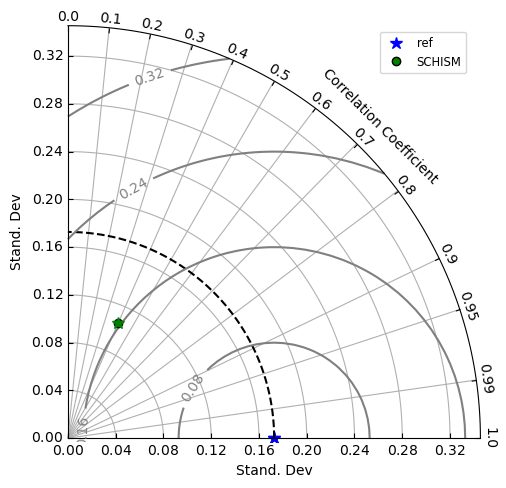

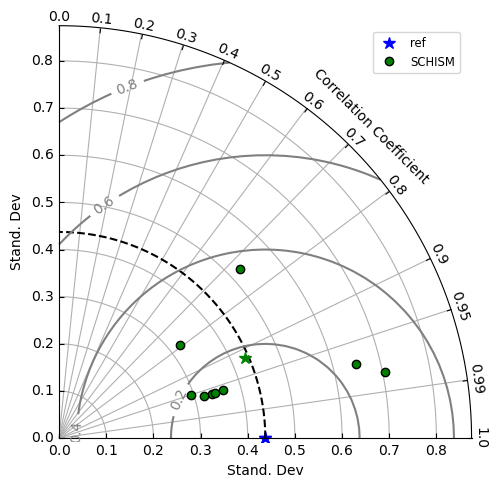

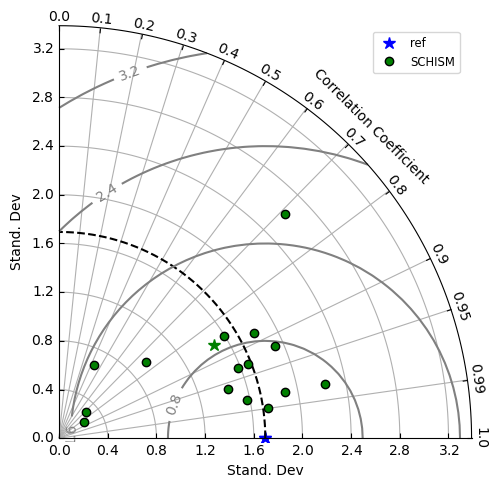

In [14]:
for f in files:
    # try:
    model,var=f.split("_")[1],f.split(".")[0]
    model="SCHISM"
    df = pd.read_csv(path+f, sep=',')
   
    df = df[~(df == -999).any(axis=1)]
    
    s=np.array(df['ofsstadev'])#np.array(df['norm_stadev'])
    r=np.array(df['r'])
    l=[model for i in r]
    s1=[np.mean(np.array(df['ofsstadev']))]#[np.mean(np.array(df['norm_stadev']))]
    r1=[np.mean(np.array(df['r']))]
    l1=[model]
    
    fname = 'TaylorDiagram.jpg'
    obsSTD = np.mean(np.array(df['obsstadev'])) #1
    srl(obsSTD, s, s1, r, r1, l,l1, fname, var)

In [62]:
f=files[-1]

In [63]:
df = pd.read_csv(path+f, sep=',')

In [64]:
model,var=f.split("_")[1],f.split("_")[2]

In [65]:
s=np.array(df['norm_stadev'])
r=np.array(df['r'])
l=[model for i in r]

In [122]:
s1=[np.array(df['norm_stadev']).mean()]
r1=[np.array(df['r']).mean()]
l1=[model]

C:\Users\Felicio.Cassalho\AppData\Local\Temp\1\ipykernel_22652\2819498335.py:4: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  tr = PolarAxes.PolarTransform()
C:\Users\Felicio.Cassalho\AppData\Local\Temp\1\ipykernel_22652\2819498335.py:73: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)


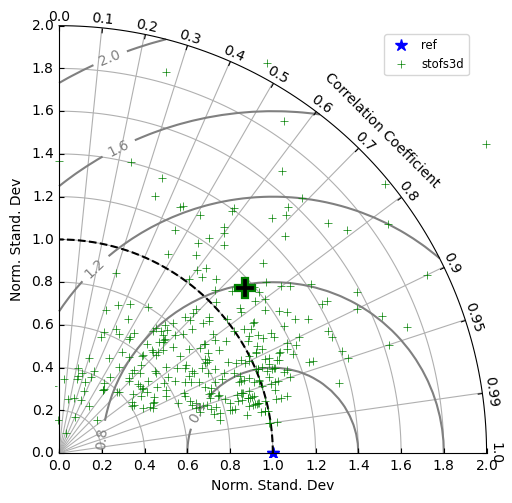

In [240]:
fname = 'TaylorDiagram.jpg'
obsSTD = 1
srl(obsSTD, s, s1, r, r1, l,l1, fname)

C:\Users\Felicio.Cassalho\AppData\Local\Temp\1\ipykernel_22652\2126476553.py:4: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  tr = PolarAxes.PolarTransform()
C:\Users\Felicio.Cassalho\AppData\Local\Temp\1\ipykernel_22652\2126476553.py:72: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)


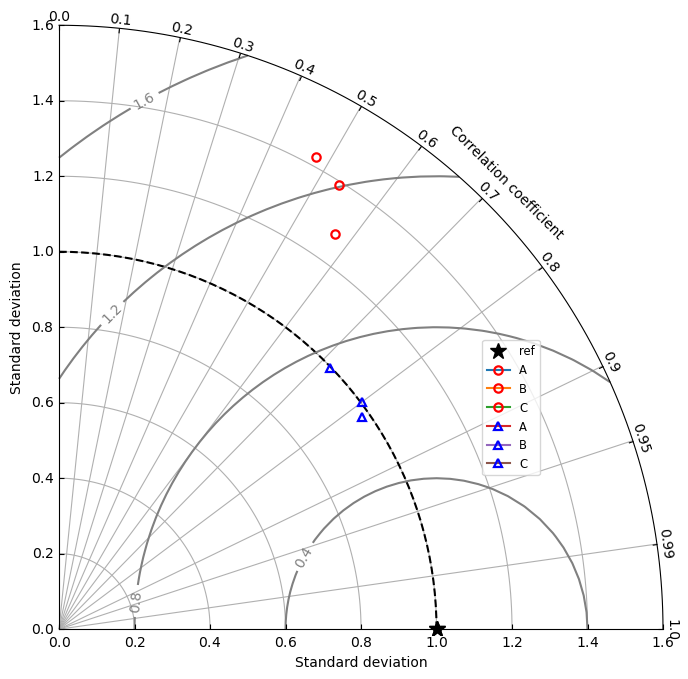

In [4]:
obsSTD = 1

s = [1.275412605,1.391302157,1.424314937]
s1 = [0.980035327,0.997244197, 1.003002031]
r = [0.572272,0.533529,0.477572]
r1 = [0.82,0.72,0.8]

l = ['A', 'B','C']
l1 = ['A', 'B','C']

fname = 'TaylorDiagram.jpg'
srl(obsSTD, s, s1, r, r1, l,l1, fname)